In [18]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from colour import wavelength_to_XYZ
import polyscope as ps  # https://polyscope.run/py/
import matplotlib.colors as mcolors


In [19]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getSampledHyperCube, getSampledHyperCubeSurface
from chromalab.spectra import Illuminant
from chromalab.adaptation import dead_leaves

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
## plotting functionality
def plotTrichromat(points, rgbs=None, alpha=0.5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    if rgbs is None:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=100, alpha=alpha)
    else:
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=rgbs, s=100, alpha=alpha)
    ax.set_xlabel('S')
    ax.set_ylabel('M')
    ax.set_zlabel('L')
    plt.show()

def plotTetrachromat(points, rgbs=None, alpha=0.5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    chrom_pts = transformToChromaticity(points)
    if rgbs is None:
        ax.scatter(chrom_pts[:, 0], chrom_pts[:, 1], chrom_pts[:, 2], s=50, alpha=alpha)
    else:
        ax.scatter(chrom_pts[:, 0], chrom_pts[:, 1], chrom_pts[:, 2], c=rgbs, s=50, alpha=alpha)
    ax.set_xlabel('G1')
    ax.set_ylabel('G2')
    ax.set_zlabel('G3')
    plt.show()

### Define Wavelength Sampling

In [22]:
wavelengths = np.arange(390, 830, 10)
d65 = Illuminant.get("E")

### Polyscope Setup

In [23]:
# Initialize polyscope and set some scene options
ps.init()

ps.set_build_gui(False)
ps.set_ground_plane_mode("none")
ps.set_SSAA_factor(4)
ps.set_background_color([0, 0, 0])

image_res = 512
ps.set_window_resizable(True)
ps.set_window_size(image_res / 2, image_res / 2) 

### Trichromat Sampling

In [24]:
trichromat = Observer.trichromat(wavelengths=wavelengths, illuminant=d65) 
LMS, rgbs = trichromat.get_full_colors_in_activations()

dead_leaves(0.5, LMS, 
            max_iters=20,
            filename='./out/dead_leaves_tri_LMS.png', 
            shape_mode='mixed')

100%|██████████| 1160/1160 [00:02<00:00, 416.59it/s]


### Trichromat Sampling with Oz

In [25]:
LMS = getSampledHyperCube(0.05, 3)
LMS_Boundary = getSampledHyperCubeSurface(0.05, 3)

dead_leaves(0.5, LMS, 
            max_iters=20,
            filename='./out/dead_leaves_tri_Oz.png', 
            shape_mode='mixed')

dead_leaves(0.5, LMS_Boundary, 
            max_iters=20,
            filename='./out/dead_leaves_tri_Oz_boundary.png', 
            shape_mode='mixed')

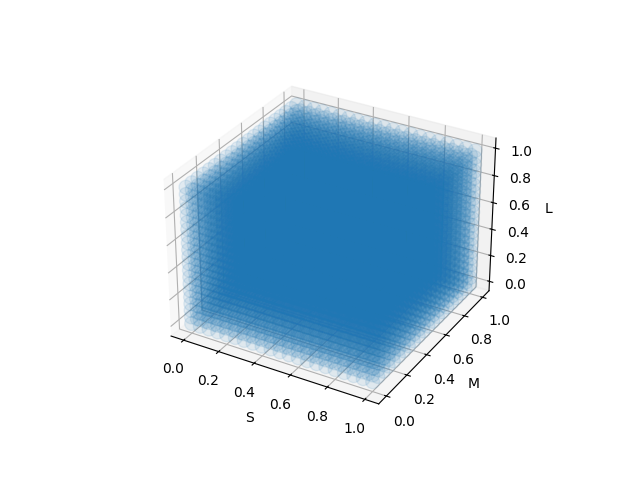

In [26]:
plotTrichromat(LMS, alpha=0.1)

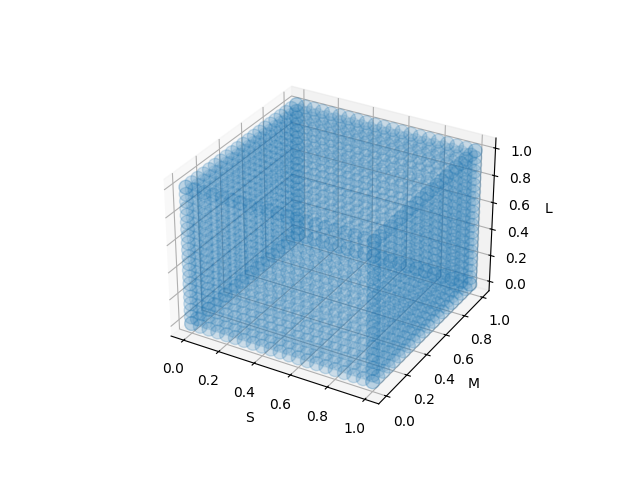

In [27]:
plotTrichromat(LMS_Boundary, alpha=0.1)

### Human Tetrachromat Sampling

In [28]:
tetrachromat = Observer.tetrachromat(wavelengths=wavelengths, illuminant=d65, verbose=True)
smql, rgbs = tetrachromat.get_full_colors_in_activations()

dead_leaves(0.5, smql, 
            max_iters=20,
            filename='./out/dead_leaves_tetra.png', 
            shape_mode='mixed')

100%|██████████| 26488/26488 [01:02<00:00, 423.21it/s]


AttributeError: module 'polyscope_bindings' has no attribute 'SaveImageMode'

: 

In [ ]:
plotTetrachromat(smql, rgbs)

### Pigeon Tetrachromat Sampling

In [ ]:
pigeon_cone_human = Observer.human_w_pigeon_cone(wavelengths=wavelengths, illuminant=d65, verbose=True)
smpl, rgbs = pigeon_cone_human.get_full_colors_in_activations()

dead_leaves(0.5, smql, 
            max_iters=20,
            filename='./out/dead_leaves_tetra_pigeon.png', 
            shape_mode='mixed')

In [ ]:
plotTetrachromat(smql)

### Oz Tetrachromat Sampling

In [ ]:
SMQL = getSampledHyperCube(0.1, 4)
SMQL_Boundary = getSampledHyperCubeSurface(0.1, 4)

dead_leaves(0.5, SMQL, 
            max_iters=20,
            filename='./out/dead_leaves_tetra_Oz.png', 
            shape_mode='mixed')

dead_leaves(0.5, SMQL_Boundary, 
            max_iters=20,
            filename='./out/dead_leaves_tetra_Oz_boundary.png', 
            shape_mode='mixed')

In [ ]:
plotTetrachromat(SMQL, alpha=0.1)

In [ ]:
plotTetrachromat(SMQL_Boundary, alpha=0.05)